# GRAB-DA Signaled vs Unsignaled

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sys
# change pkg_path variable to the directory storing the package
sys.path.insert(0, '../utility_code')
import fp_dat, fp_viz
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sci


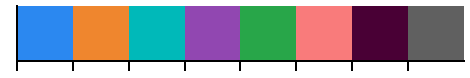

In [2]:
fp_viz.plot_style()
npg_pal=['#2b88f0', '#EF862E', '#00B9B9', '#9147B1', '#28A649', '#F97B7B', '#490035', '#606060']
fp_viz.set_palette(color_pal=['#2b88f0', '#EF862E', '#00B9B9', '#9147B1', '#28A649', '#F97B7B', '#490035', '#606060'], show = True)

In [3]:
df_train_trials = pd.read_csv(
    './data-clean/GRAB_DA_Signaled_Unsignaled.csv')


Text(0.5, 0, '')

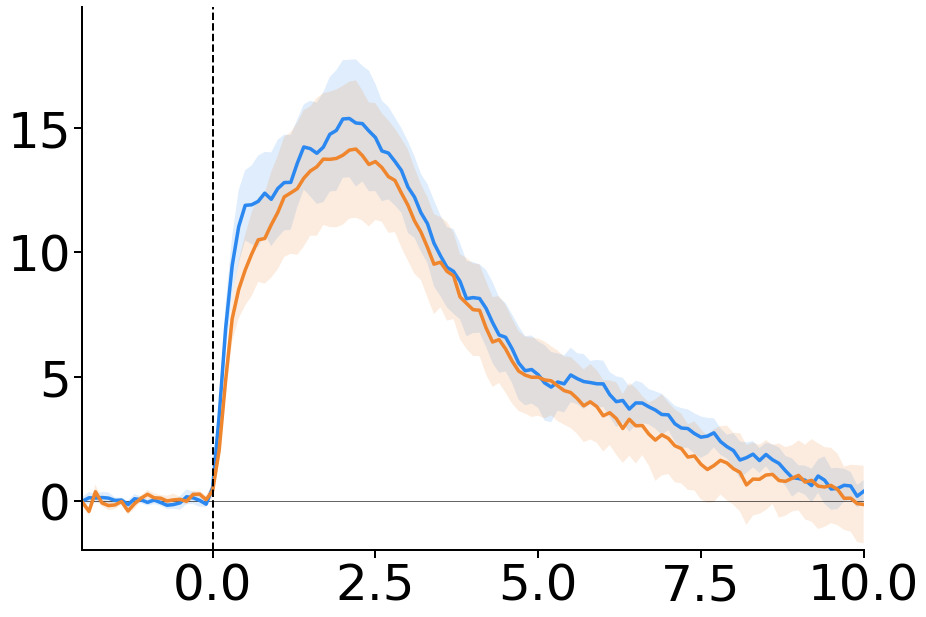

In [4]:
fp_viz.plot_style()
fig, ax = plt.subplots(figsize=(14, 10))
fp_viz.tfc_trial_avg(df_train_trials, hue='shock',
                     yvar='dFF_baseline_norm', 
                     ax=ax, cs_dur=0, us_dur=0,
                     linewidth = 3.5)
plt.xlim(-2, 10)
plt.ylim(-2, 19.9)

plt.axvline(x=0, color='k', linestyle='--', linewidth=2)


plt.legend('')

ax.tick_params(labelsize=50, width=2, length=8)
ax.set_ylabel('')
ax.set_xlabel('')



In [5]:
df_quant = df_train_trials.loc[df_train_trials.time_trial.between(0,5)]



In [6]:
df_quant = df_quant.groupby(['Animal', 'shock', 'time_trial'], as_index=False).mean()
df_quant = df_quant.groupby(['Animal', 'shock'], as_index=False).max()

df_quant = df_quant[['Animal', 'shock', 'Trial', 'dFF_baseline_norm']]


No handles with labels found to put in legend.


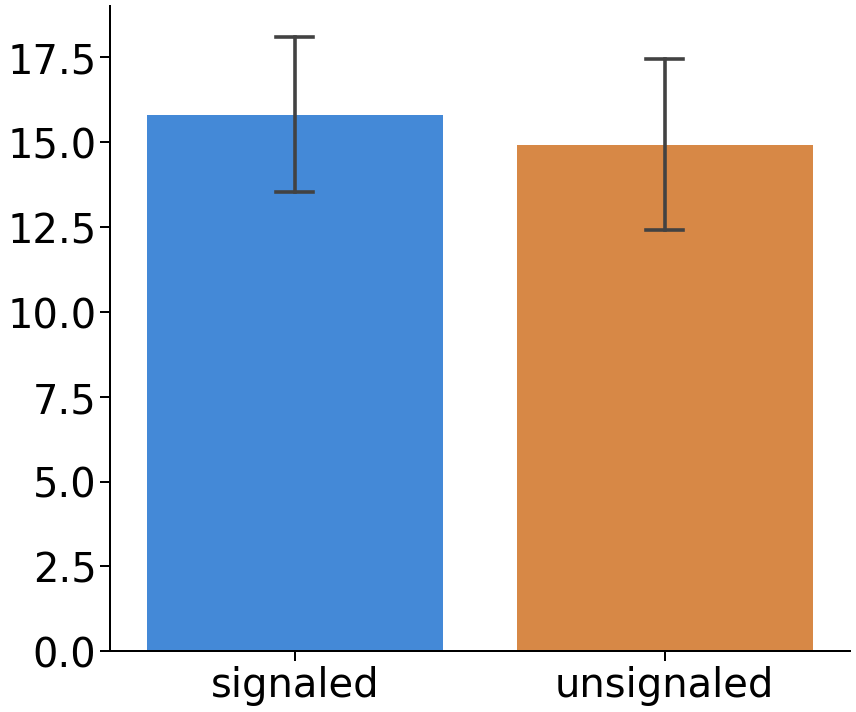

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.barplot(x='shock', y='dFF_baseline_norm',
            ci=68, capsize=0.1,
            data=df_quant)


plt.legend(loc='upper right')

ax.set_ylabel('')

#ax.set_xticklabels(['Veh',  'CNO', 'CNO + Yoh'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.axhline(color='k')
plt.xlabel("")


plt.tight_layout()


In [8]:
import pingouin as pg

In [9]:
signaled = df_quant.loc[df_quant.shock == 'signaled', 'dFF_baseline_norm']
unsignaled = df_quant.loc[df_quant.shock == 'unsignaled', 'dFF_baseline_norm']


/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [10]:
pg.ttest(signaled, unsignaled, paired = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.758718,4,two-sided,0.153446,"[-0.51, 2.28]",0.160239,1.015,0.059146
